In [1]:
import pandas as pd
import numpy as np
import telecontrol_parser as tp
import timeseries_functions as tf
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import modelling as mdl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import tkinter
import plotly

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

In [2]:
    MLdb = mdl.MLdata('../data_sets/feats')
    MLdb.load_datasets()
    # MLdb.combine_datasets()
    # print(MLdb.datadict[list(MLdb.datadict.keys())[2]])
    # print(MLdb.datadict['ALL'])
    # print(MLdb.get_datasets())
    MLdb.set_dataset(0)
    MLdb.clean_columns()
    MLdb.drop_na()
    MLdb.create_train_test_split(0.8)
    MLdb.linear_regression()
    model = MLdb.model

0.799499607743924


In [3]:
len(MLdb.test_x)

20037

In [4]:
len(MLdb.test_y.iloc[:,0])

20037

In [5]:
y_pred = model.predict(MLdb.test_x)
horizon = 36
scale = 0.75
plot = plt.figure(figsize=(scale*1920/my_dpi, scale*1080/my_dpi))
plt.plot(MLdb.test_y.iloc[:,horizon-1],label = 'true')
plt.plot(MLdb.test_x.index,y_pred[:,horizon-1], label = 'prediction')
plt.legend(fontsize = 'xx-large',loc = 'lower right')
# plt.ylim(0,20)

plotly.tools.mpl_to_plotly(plot)

c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [6]:
# print(MLdb.test_y)
# print(y_pred)
test_y = MLdb.test_y.iloc[:,0].values
pred_y = y_pred[:,0]

# print(mse(MLdb.test_y,y_pred)**(1/2))

In [7]:
len(MLdb.naive_predictive())
# MLdb.test_x

20037

In [8]:
y_pred_naive = MLdb.naive_predictive().to_numpy()

<Figure size 432x288 with 0 Axes>

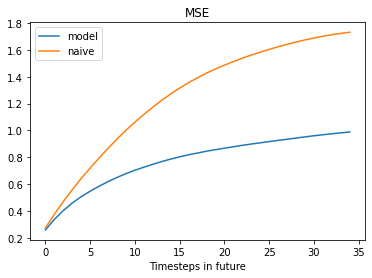

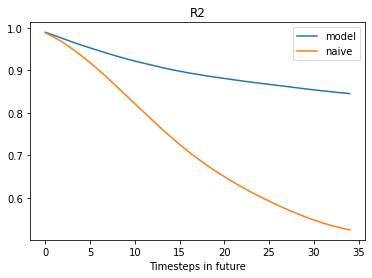

<Figure size 432x288 with 0 Axes>

In [11]:
MSE_list = []
R2_list = []
MSE_list_naive = []
R2_list_naive = []


for i in range(0,MLdb.test_y.shape[1]-1):
    test_y = MLdb.test_y.iloc[:,i].values
    pred_y = y_pred[:,i]
    pred_y_naive = y_pred_naive[:,i]
    MSE_list.append(mse(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    MSE_list_naive.append(mse(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))

plt.plot(MSE_list,label = 'model')
plt.plot(MSE_list_naive,label = 'naive')
plt.title('MSE')
plt.xlabel('Timesteps in future')
plt.legend()
plt.figure()
plt.plot(R2_list,label = 'model')
plt.plot(R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Timesteps in future')
plt.legend()
plt.figure()
